# Time Series Data
> Date can be set as ```index``` in Pandas.  
> When **index** is date, ```parse_dates=True``` allows Python to parse the index as date.   

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
mcdon = pd.read_csv('mcdonalds.csv',index_col='Date',parse_dates=True)

In [4]:
mcdon.head()

Adj. Close  Adj. Volume
Date                               
1970-01-02    0.209761    2825604.0
1970-01-05    0.213316    2210449.5
1970-01-06    0.214501    1951168.5
1970-01-07    0.213316    2728768.5
1970-01-08    0.213316    2242404.0

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

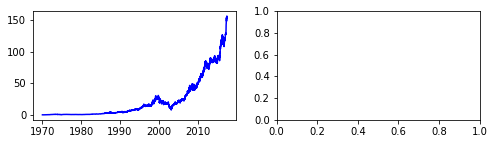

In [37]:
fig, axes = plt.subplots(1,2,figsize=(8,2))

axes[0].plot(mcdon['Adj. Close'],color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Adj. Close')
axes[0].set_title('Adj. Close')

axes[1].plot(mcdon['Adj. Volume']/1000000,color='red')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Adj. Volume')
axes[1].set_title('Adj. Volume (in Million)')

Text(0.5, 1.0, 'Mcdonalds')

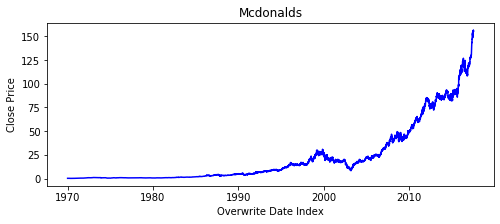

In [39]:
plt.figure(figsize=(8,3))

plt.plot(mcdon['Adj. Close'],color='blue')
plt.ylabel('Close Price')
plt.xlabel('Overwrite Date Index')
plt.title('Mcdonalds')

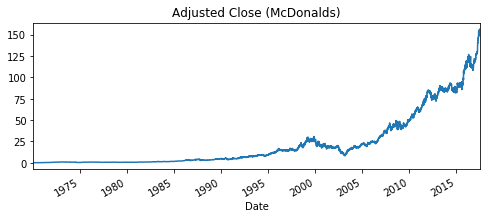

In [40]:
mcdon['Adj. Close'].plot(figsize=(8,3),title='Adjusted Close (McDonalds)')

## Formatting
> Date format: yyyy-mm-dd  
> Format the date: https://help.plot.ly/date-format-and-time-series/  
> Color and Style: ```ls``` can be dashed '--', solid '-' and dashed-dot '-.'.  
> Subsets can be done by ```xlim``` and ```ylim```.  

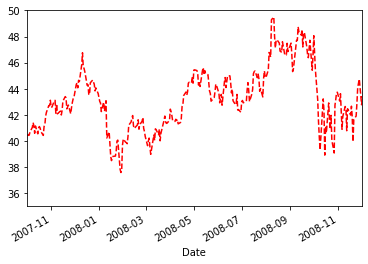

In [56]:
mcdon['Adj. Close'].plot(xlim=['2007-10-01','2008-12-01'],ylim=[35,50],ls='--',c='r')

## X Ticks

This is where you will need the power of matplotlib to do heavy lifting if you want some serious customization!

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as dates

In [18]:
idx   = mcdon.loc['2007-01-01':'2007-05-01'].index
stock = mcdon.loc['2007-01-01':'2007-05-01']['Adj. Close']

In [60]:
idx[-5:]

DatetimeIndex(['2007-04-25', '2007-04-26', '2007-04-27', '2007-04-30',
               '2007-05-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [20]:
stock.head()

Date
2007-01-03    31.662754
2007-01-04    31.424580
2007-01-05    31.424580
2007-01-08    31.547276
2007-01-09    31.605015
Name: Adj. Close, dtype: float64

 ## Overlapping Dates

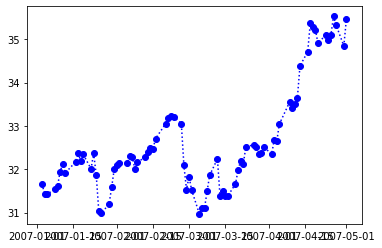

In [81]:
fig, ax = plt.subplots()

ax.plot_date(idx, stock, xdate=True, fmt='o:b')
plt.show()

## Fix the overlap!

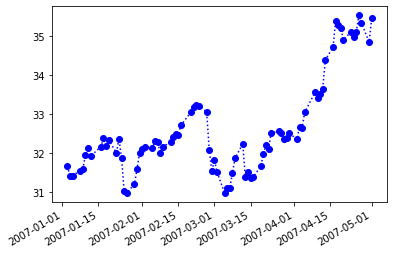

In [83]:
fig, ax = plt.subplots()

ax.plot_date(idx, stock, xdate=True, fmt='o:b')
fig.autofmt_xdate() # Auto fixes the overlap!

plt.show()

## Customize grid

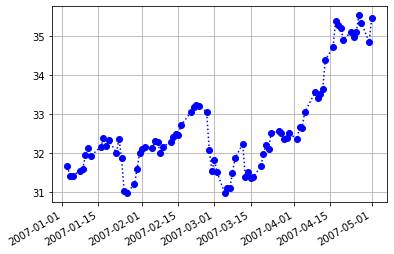

In [85]:
fig, ax = plt.subplots()

ax.plot_date(idx, stock, xdate=True, fmt='o:b')

ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig.autofmt_xdate() # Auto fixes the overlap!

plt.show()

## Format dates on Major Axis

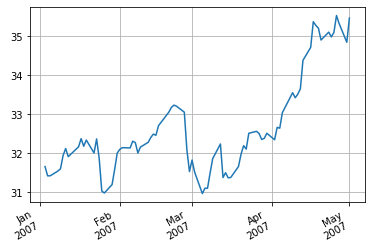

In [86]:
fig, ax = plt.subplots()
ax.plot(idx, stock,'-')

# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

# Major Axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))

fig.autofmt_xdate()

plt.show()

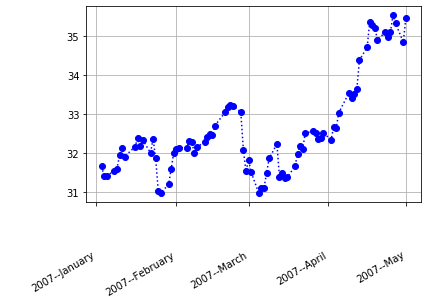

In [87]:
fig, ax = plt.subplots()

ax.plot_date(idx, stock, xdate=True, fmt='o:b')

# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

# Major Axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n\n%Y--%B'))

fig.autofmt_xdate() 

plt.show()

## Minor Axis

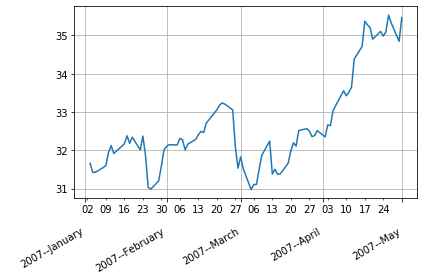

In [88]:
fig, ax = plt.subplots()
ax.plot(idx, stock,'-')


# Major Axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y--%B'))

# Minor Axis
ax.xaxis.set_minor_locator(dates.WeekdayLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig.autofmt_xdate() 
plt.tight_layout()
plt.show()

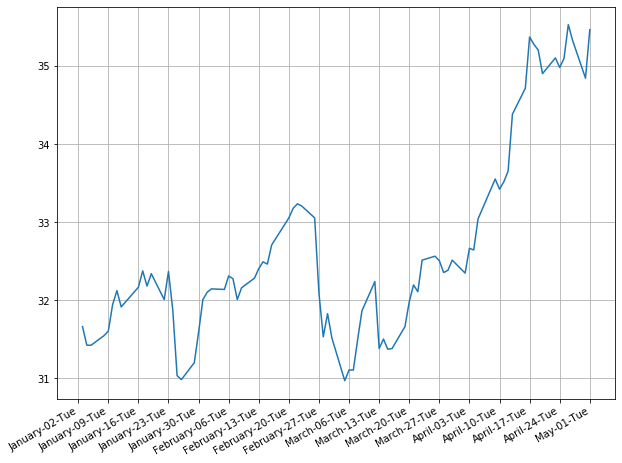

In [89]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot_date(idx, stock,'-')


# Major Axis
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=1))
ax.xaxis.set_major_formatter(dates.DateFormatter('%B-%d-%a'))
# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig.autofmt_xdate() # Auto fixes the overlap!

plt.show()

# Activity 1
> Scrape the data using 
```python
goyal = pd.read_excel(io='http://www.hec.unil.ch/agoyal/docs/PredictorData2018.xlsx', sheet_name='Monthly')
```
> Convert **index** in the format of **yyyymm** to datetime using  
```python
goyal['Date'] = pd.to_datetime(goyal['yyyymm'], format='%Y%m')  
```
> Plot the SP500 **Index** for the whole period.  
> Plot the SP500 **Index** from '2006-01-01' to '2018-12-01'.  

